Labor Force Participation in Western European countries
==============
January 31st, 2017

**Group members:**

|Name|ANR|
|:----:|:-----:|
|Binh Nguyen|150141|
|Fizzah Malik|975391|
|Ananya Velamakanni|349166|

This notebook applys python in conducting an empirical research. We examine the relation between education and labor force participation by using linear regression and logistic models. The python code and data used in this notebook can be found at [github](https://github.com/BinhNguyen71/Python-Assignment).

## I. Research Question
What is the impact of education in increasing labor force participation in Western European countries?

## II. Motivation
The European Union has seen a slow rise in labor force participation over the last few years. With more and more people experiencing low job-finding rates, it is interesting to see what the level of education attainment could have to encourage people to look for jobs.  The relation between an individual’s education and his/her participation in the labor force has been the topic of numerous studies. Economists have established the various relations between labor force participation, education, age, number of children and so on. For instance, [Kennedy, Stoney and Vance](#Reference) examined changes in labor force participation rates for people with different levels of education by analyzing trends in an Australian Census data (1981-2006).They have focused on the population, participation and productivity as the drivers of future economic growth. Their data and analysis provides evidence of a strong positive correlation and a causal link between educational attainment and labor force participation.

Furthermore, [Edward Bbale and Paul Mpuga](#Reference) have used the maximum likelihood method to test the fairly the same hypothesis that we are proposing using data from Uganda Demographic Survey 2006. The dependent variable used is a dummy variable (Y=1 if in labor force) and the independent variable is a vector summing up factors, such as, age, marital status, education etc. Their results confirm that education increases the likelihood to be employed.

## III. Method
+ Firstly, we check the data downloaded from easyShare (eyeballing raw data), calculate some simple statistics and make some graphs to get a first idea about the data and the findings. [*(Descriptive Statistics)*](#Descriptive Statistics)
+ Then we run some regression analysis to examine the relation between labor force participation and education, as well as some other covariates. We conduct both simple linear regression and multiple regression. [*(OLS Regression)*](#OLS Regression)
+ Lastly, we run a logistic regression because it fits with the binary dependent variable we have from the data more than the OLS regression model.[*(Logistic Regression)*](#Logistic Regression)

## IV. Main Assumptions
1. The dependent variable is the binary *emp*, which is equal to 1 if the individual is currently participating in the labor force, and 0 otherwise.

2. Our key variable of interest is *educ*, which is the number of years of educations attained by an individual. 

3. In order to conduct an OLS regression, we are implicitly assuming the key five assumptions of linear regression:
    + Linear relationship.
    + Multivariate normality.
    + No or little multicollinearity.
    + No auto-correlation.
    + Homoscedasticity.

4. In addition to the above, logistic regression requires the dependent variable to be binary. It also assumes that P(Y=1) is the probability of the event occurring, in our case that is the being employed. The error terms need to be independent and the data is from an independent sample. More importantly, the logisitic regression (linear probability model) is heteroskedastic by nature.

## V. Answers

1. There is a causal effect between the number of years of education and labor force participation in Western European countries. 
2. The probability of being employed gradually increases as level of education rises.
3. The effect seems to be small, but statistically significant.

## VI. Execution
### 1. Descriptive Statistics <a id='Descriptive Statistics'></a>
The data has been extracted from the [easySHARE data set](https://github.com/BinhNguyen71/Python-Assignment/blob/master/Data.xlsx). We only use the necessary data from wave 2. The data consists information about gender *(female)*, age *(age)*, years of education *(educ)*, household size *(hhsize)*, the number of children in the household *(child)*, and employment status *(emp)* of 7305 subjects across 10 Western European countries namely Austria, Belgium, Denmark, France, Germany, Italy, The Netherlands, Spain, Sweden and Switzerland. The main dependent variable *emp*, which indicates whether the subject is employed or unemployed, is the dummy variable (1 if employed and 0 if unemployed).  The mode of employment status, being 1 for each country, indicates that there are more people employed than unemployed in each of the countries in the sample. This is a clear conclusion as the countries under study are all developed economies.

In [1]:
# Imported packages:
# Statsmodels for statistical analysis
# Numpy and Pandas for data handling and analysis
# Matplotlib and Plotly for plotting

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import Figure, Bar
from numpy import arange,array,ones
from matplotlib import pylab
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Reading data from excel file and basic statistics summary of each variables
data = pd.read_excel('C:\Users\Binh Nguyen\Desktop\Data.xlsx')
data.describe().transpose ()

,count,mean,std,min,25%,50%,75%,max
emp,7305.0,0.916085,0.277279,0.0,1.0,1.0,1.0,1.0
female,7305.0,0.507187,0.499983,0.0,0.0,1.0,1.0,1.0
age,7305.0,55.767379,4.790684,28.2,52.5,55.5,58.8,85.4
educ,7305.0,12.634908,3.985183,0.0,10.0,13.0,15.0,25.0
hhsize,7305.0,2.565229,1.098339,1.0,2.0,2.0,3.0,9.0
child,7305.0,2.106092,1.237245,0.0,1.0,2.0,3.0,10.0


In [3]:
#Calculating modes (since this is a better descriptor for binary data like emp)
data.groupby('country')['emp', 'educ','female' , 'age', 'hhsize' , 'child'].agg(lambda x: x.value_counts().index[0])

,emp,educ,female,age,hhsize,child
country,,,,,,
Austria,1,8.0,1,54.8,2,2
Belgium,1,12.0,0,55.8,2,2
Denmark,1,14.0,1,52.3,2,2
France,1,12.0,1,50.8,2,2
Germany,1,12.0,1,56.3,2,2
Italy,1,13.0,0,51.6,4,2
Netherlands,1,10.0,0,53.3,2,2
Spain,1,8.0,0,50.9,3,2
Sweden,1,12.0,1,55.8,2,2


#### Employment status by country:

In [4]:
# Grouping data based on the country and employment status
grouped_data = pd.DataFrame(data.groupby(['country', 'emp']).size()).reset_index()
grouped_data.columns = ['Country', 'Employment', 'Number of people']
print grouped_data

data_unemployed = grouped_data[grouped_data.Employment==0].reset_index().drop('index', 1)
data_unemployed.columns = ['Country', 'Employment', 'Count']
data_employed = grouped_data[grouped_data.Employment==1].reset_index().drop('index', 1)
data_employed.columns = ['Country', 'Employment', 'Count']

        Country  Employment  Number of people
0       Austria           0                17
1       Austria           1               147
2       Belgium           0               134
3       Belgium           1               777
4       Denmark           0                65
5       Denmark           1              1057
6        France           0                80
7        France           1               804
8       Germany           0               127
9       Germany           1               693
10        Italy           0                39
11        Italy           1               514
12  Netherlands           0                29
13  Netherlands           1               792
14        Spain           0                61
15        Spain           1               422
16       Sweden           0                39
17       Sweden           1               929
18  Switzerland           0                22
19  Switzerland           1               557


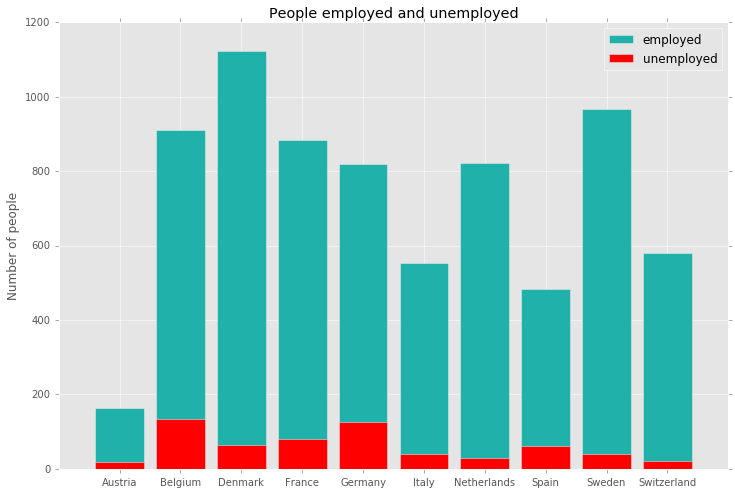

In [5]:
# Count the number of people employed and unemployed in each country
countries = grouped_data.Country.unique()
num_countries = len(countries)
ind = np.arange(num_countries)
unemployed = data_unemployed.Count
employed = data_employed.Count

# Plot bar graph of the number of people employed and unemployed in each country
plt.figure(figsize=(12,8))
p1 = plt.bar(ind, employed + unemployed, color='LightSeaGreen',align='center')
p2 = plt.bar(ind, unemployed, color='red', align='center')

plt.ylabel('Number of people')
plt.title('People employed and unemployed')
plt.xticks(ind, countries)
plt.legend((p1[0], p2[0]), ('employed', 'unemployed'))
plt.axis([-1, 10, 0, 1200])
plt.show()

In [6]:
# Calculate the percentage of unemployed and employed in each country (round up to 2 decimal places)
country_size = pd.DataFrame(data.groupby(['country']).size()).reset_index()
country_size.columns = ['Country', 'Size']
country_size['% employed'] = (data_employed['Count']/country_size['Size']) * 100
country_size['% unemployed'] = (data_unemployed['Count']/country_size['Size']) * 100
country_size = country_size.round(2)
country_size

,Country,Size,% employed,% unemployed
0,Austria,164,89.63,10.37
1,Belgium,911,85.29,14.71
2,Denmark,1122,94.21,5.79
3,France,884,90.95,9.05
4,Germany,820,84.51,15.49
5,Italy,553,92.95,7.05
6,Netherlands,821,96.47,3.53
7,Spain,483,87.37,12.63
8,Sweden,968,95.97,4.03
9,Switzerland,579,96.20,3.80


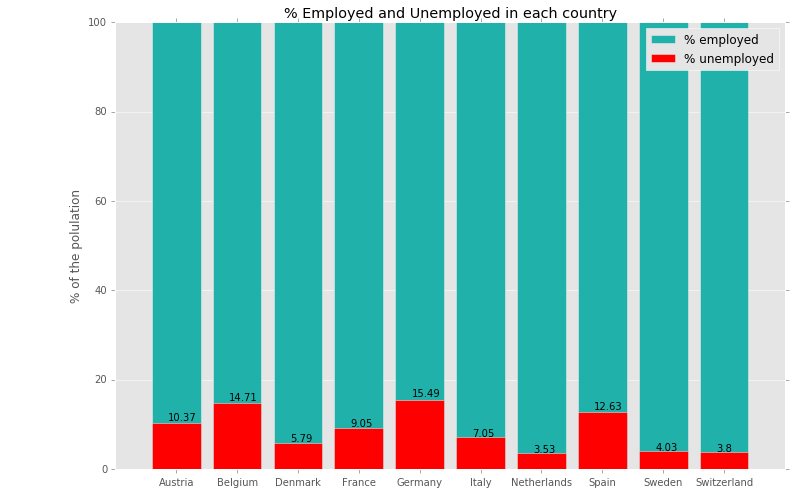

In [7]:
# Calculate % employed and unemployed in each country
countries = grouped_data.Country.unique()
num_countries = len(countries)
ind = np.arange(num_countries)
unemployed = country_size['% unemployed']
employed = country_size['% employed']

# Plotting a graph of employment percentage
fig = plt.figure(figsize=(12,8))
p1 = plt.bar(ind, employed + unemployed, color='LightSeaGreen', align='center')
p2 = plt.bar(ind, unemployed, color='Red', align='center')

# Formatting the graph
plt.ylabel('% of the polulation')
plt.title('% Employed and Unemployed in each country')
plt.xticks(ind, countries)
plt.legend((p1[0], p2[0]), ('% employed', '% unemployed'))
plt.axis([-1, 10, 0, 100])
ax = fig.add_subplot(111)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/3, p.get_height() * 1.05))
plt.show()

Bar graphs showing the number (graph above) and percentage (graph below) of the people employed and unemployed in each country
The unemployment rate stands the highest in Germany while the least in The Netherlands. This contradicts when we compare unemployment in terms of number as Belgium is the country with most number of unemployed and Austria with the least. This can be due to the fact that the number of observations is not the same in all countries in the sample.

#### Average years of education by country and by gender:

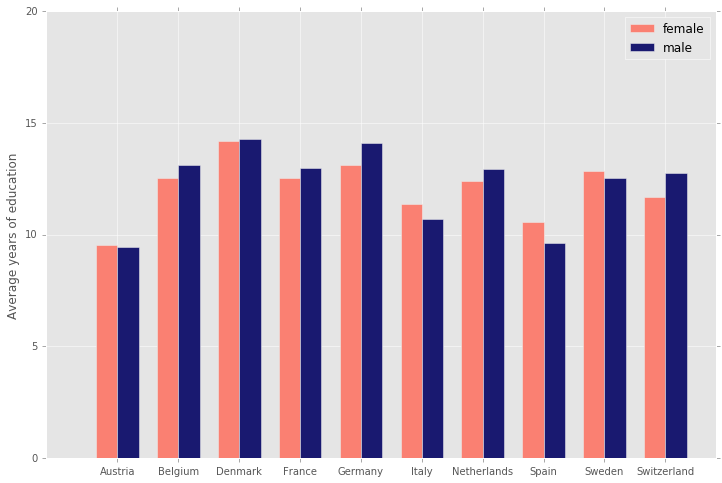

In [8]:
# Calculate average years of education by gender
education_average = data.groupby(['country', 'female']).mean().reset_index()
education_average_female = education_average[education_average.female==1].reset_index().drop('index', 1)
education_average_male = education_average[education_average.female==0].reset_index().drop('index', 1)

#Plotting bar graph for average years of education by gender
fig, ax = plt.subplots(figsize=(12,8))

#Grouping gender for each country to plot graph
countries = grouped_data.Country.unique()
num_countries = len(countries)
ind = np.arange(num_countries)
avg_female_edu = education_average_female.educ
avg_male_edu = education_average_male.educ
width = 0.35  

f1 = ax.bar(ind, avg_female_edu, width, color='salmon', align='center')
f2 = ax.bar(ind+width, avg_male_edu, width, color='MidnightBlue', align='center')

ax.set_ylabel('Average years of education')
ax.set_xticks(ind+width/2)
ax.legend((f1[0], f2[0]), ('female', 'male'))
ax.set_xticklabels(countries)
plt.axis([-1, 10, 0, 20])
plt.show()

Bar graph showing the average education years for males and females in each country. The graph allows gender comparison in terms of the education level in each country. 4 out of the 10 countries show a significantly higher number of education years for males, 4 countries show female education years are higher while in 2 countries, the average years of education stand almost equal for males and females. Notably, Austria despite having a relatively fewer number of observations, has on average equal number of education years for males and females.

#### We also check the average years of education by employment status and by gender:

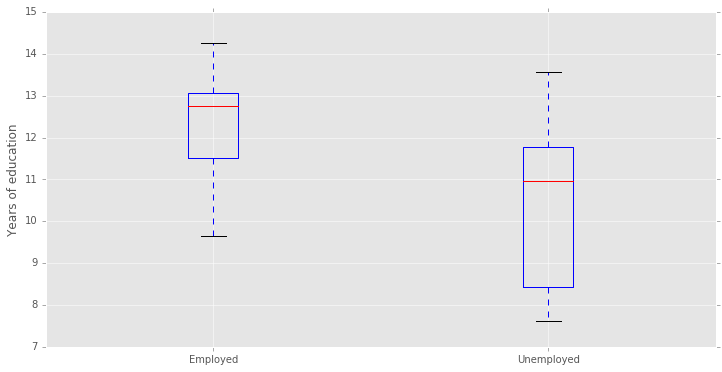

In [9]:
# Calculate average years of education by employment status
data_average_educ = data.groupby(['country', 'emp']).mean().reset_index()
data_average_education_employed = data_average_educ[data_average_educ.emp==1].reset_index().drop('index', 1)
data_average_education_unemployed = data_average_educ[data_average_educ.emp==0].reset_index().drop('index', 1)

avg_edu_emp = data_average_education_employed.educ
avg_edu_unemp = data_average_education_unemployed.educ

#Plotting box plot
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot([avg_edu_emp, avg_edu_unemp])
ax.set_ylabel('Years of education')
ax.set_xticklabels(('Employed', 'Unemployed'))
plt.show()

Box-plot showing the number of education years for the employed and unemployed subjects (plot above) and for males and females  (plot below) in the sample
We can see that subjects who are employed, on average, tend to have a greater number of years of education. Also, as we check the difference between the two genders, the male subjects have a higher average of years of education than the female’s.

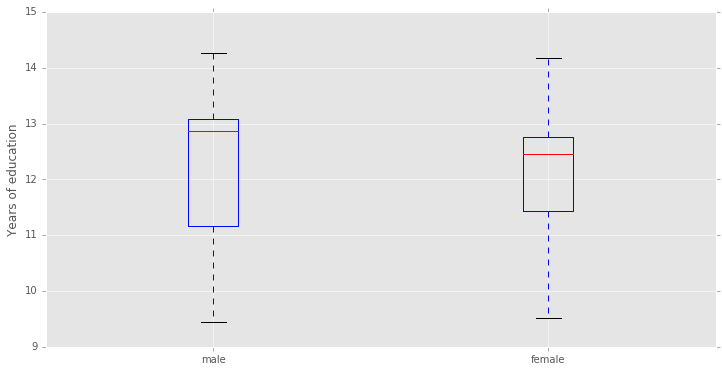

In [10]:
# Plotting boxplot of years of education by gender
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot([education_average_male.educ, education_average_female.educ])
ax.set_ylabel('Years of education')
ax.set_xticklabels(('male', 'female'))
plt.show()

### 2. OLS Regression<a id='OLS Regression'></a>
From the simple descriptive statistics above, we can see there might be a relation between employment status and number of years of education completed. And since education usually happens before work, we will run a regression of *emp* on *educ*. First, we conduct a simple linear regression analysis using *educ* as the only independent variable. Then we run a multiple regression with other available covariates such as *female, age, hhsize, child* to check if they have any impact on *emp*, because we think that each of these factors might have causual effect on the current employment status of the subjects in the dataset.
#### 2.1 Simple Linear Regression
$$emp_i=\beta_0 + \beta_1 educ_i + \epsilon_i$$
We fit the linear model using statmodels:
+ Describle the model
+ Fit the model
+ Inspect the results

In [11]:
# Describe model
mod = smf.ols(formula='emp ~ educ', data=data)     

# Fit model
slr = mod.fit()

# Summarize model
print slr.summary()

                            OLS Regression Results                            
Dep. Variable:                    emp   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     113.3
Date:                Mon, 30 Jan 2017   Prob (F-statistic):           2.85e-26
Time:                        11:21:13   Log-Likelihood:                -938.26
No. Observations:                7305   AIC:                             1881.
Df Residuals:                    7303   BIC:                             1894.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8074      0.011     75.432      0.0

From the result of the simple regression above, we can see that $\beta_0=0.8074 ; \beta_1=0.0086$, and p-value = 0.000 so we can reject the null hypothesis of no effect, and *educ*'s coefficient is statistically significant at 99% confidence intervals. **The number of years of education do help explain the employment status.** However, the effect seems to be small, because 1 extra year of education only increases employment by 0.0086 (which is very small compared to the range from 0 to 1). Therefore, we suspect that there might be omitted variable bias. A multiple regression including other variables will be more practical since employment can be affected by other things in life, such as the subjects' age, gender, whether he/she has kids or not, etc. 

We create a fitted line plot for this model:

In [12]:
# Draw out data for emp and educ, as well as generate linear fit line of emp
emp = data.emp
educ = data.educ

# Generated linear fit
line = 0.0086*educ+0.8074

# Creating the dataset, and generating the plot
trace1 = go.Scatter(
                  x=educ, 
                  y=emp, 
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 127, 14)'),
                  name='Data'
                  )

trace2 = go.Scatter(
                  x=educ, 
                  y=line, 
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

annotation = go.Annotation(
                  x=15,
                  y=0.6,
                  text='$R^2 = 0.015, emp = 0.0086educ + 0.8074$',
                  showarrow=False,
                  font=go.Font(size=12)
                  )
layout = go.Layout(
                title='Linear Fit in Simple Linear Regression',
                plot_bgcolor='rgb(229, 229, 229)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                  annotations=[annotation]
                )

Plotdata = [trace1, trace2]
fig = go.Figure(data=Plotdata, layout=layout)
py.iplot(fig, filename='Linear-Fit-in-Simple-Linear-Regression')

#### 2.2 Multiple Regression

We run a multiple regression with all other factors as independent variables because we suspect that they can all contribute to a difference in the labor force participation of the subject. Moreover, since all the countries are mutually exclusive categories and employment may be influenced by this geographical variable, we use 9 dummy variables to represent the 10 countries in Western Europe in the data.

$$emp_i=\beta_0 + \beta_1 educ_i + \beta_2 female_i+ \beta_3 age_i+ \beta_4 hhsize_i+ \beta_5 child_i+ \sum_{i=0}^8 \gamma_i C_i + \epsilon_i$$

|Dummy variable value|$C_0$|$C_1$|$C_2$|$C_3$|$C_4$|$C_5$|$C_6$|$C_7$|$C_8$|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|Austria|0|0|0|0|0|0|0|0|0|
|Belgium|1|0|0|0|0|0|0|0|0|
|Denmark|0|1|0|0|0|0|0|0|0|
|France|0|0|1|0|0|0|0|0|0|
|Germany|0|0|0|1|0|0|0|0|0|
|Italy|0|0|0|0|1|0|0|0|0|
|Netherlands|0|0|0|0|0|1|0|0|0|
|Spain|0|0|0|0|0|0|1|0|0|
|Sweden|0|0|0|0|0|0|0|1|0|
|Switzerland|0|0|0|0|0|0|0|0|1|

In [13]:
# creating country dummies and get rid of 1 dummy variable to avoid the dummy variable trap
country_dummies = pd.get_dummies(data['country'], drop_first=True)

#Creating a clean data frame for regression
cols_to_keep = ['emp','female','age','educ','hhsize','child']
data_with_dummies = data[cols_to_keep].join(country_dummies)

# Summarize and check the new data
data_with_dummies.describe()

,emp,female,age,educ,hhsize,child,Belgium,Denmark,France,Germany,Italy,Netherlands,Spain,Sweden,Switzerland
count,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000
mean,0.916085,0.507187,55.767379,12.634908,2.565229,2.106092,0.124709,0.153593,0.121013,0.112252,0.075702,0.112389,0.066119,0.132512,0.079261
std,0.277279,0.499983,4.790684,3.985183,1.098339,1.237245,0.330411,0.360583,0.326165,0.315698,0.264538,0.315866,0.248507,0.339070,0.270164
min,0.000000,0.000000,28.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,52.500000,10.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,55.500000,13.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,58.800000,15.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,85.400000,25.000000,9.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We fit the linear model again:

In [14]:
# Describe model
mod2 = smf.ols(formula='emp ~ educ + female + age + hhsize + child + country_dummies', data=data_with_dummies)    

# Fit model
mtr = mod2.fit()

# Summarize model
print mtr.summary()

                            OLS Regression Results                            
Dep. Variable:                    emp   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     28.19
Date:                Mon, 30 Jan 2017   Prob (F-statistic):           2.13e-73
Time:                        11:21:43   Log-Likelihood:                -801.93
No. Observations:                7305   AIC:                             1634.
Df Residuals:                    7290   BIC:                             1737.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              1.0103      0

$$emp_i=1.0103+0.0087educ_i-0.0161female_i-0.0039age_i+0.0148hhsize_i-0.0042child_i-0.0767C_0+0.0106C_1-0.0189C_2-0.0826C_3+0.0081C_4+0.0411C_5-0.0375C_6+0.0500C_7+0.0471C_8+\epsilon_i$$

Again, the p-value of *educ* is 0.000. Therefore we can still conclude that *educ* is statistically significant at 99% confidence intervals and have **a positive effect on *emp***, although the effect is still small (1 extra year of education only increases employment by 0.0087). 

The fitted line plot for this model is generated below:

In [15]:
# Draw out data for emp and educ, as well as generate linear fit line of emp
emp1 = data_with_dummies.emp
educ1 = data_with_dummies.educ
female = data_with_dummies.female
age = data_with_dummies.age
hhsize = data_with_dummies.hhsize
child = data_with_dummies.child
Belgium = data_with_dummies.Belgium
Denmark = data_with_dummies.Denmark
France = data_with_dummies.France
Germany = data_with_dummies.Germany
Italy = data_with_dummies.Italy
Netherlands = data_with_dummies.Netherlands
Spain = data_with_dummies.Spain
Sweden = data_with_dummies.Sweden
Switzerland = data_with_dummies.Switzerland

# Generated linear fit, and rearrange data by educ and the prediction value of emp (for a clear plot)
line1=1.0103+0.0087*educ1-0.0161*female-0.0039*age+0.0148*hhsize-0.0042*child-0.0767*Belgium+0.0106*Denmark-0.0189*France-0.0826*Germany+0.0081*Italy +0.0411*Netherlands -0.0375*Spain+0.0500*Sweden +0.0471*Switzerland 
data_with_dummies_fit = pd.concat ([data_with_dummies,line1], axis=1)
data_with_dummies_fit.columns.values[15] = 'line1'
sorted_data = data_with_dummies_fit.sort_values(by=['educ','line1'])
emp1 = sorted_data.emp
educ1 = sorted_data.educ
line1 = sorted_data.line1

# Generating the plot with scattered points and fitted line
trace3 = go.Scatter(
                  x=educ1, 
                  y=emp1, 
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 127, 14)'),
                  name='Data'
                  )

trace4 = go.Scatter(
                  x=educ1, 
                  y=line1, 
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

layout1 = go.Layout(
                title='Linear Fit in Multiple Linear Regression',
                plot_bgcolor='rgb(229, 229, 229)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                )

Plotdata1 = [trace3, trace4]
fig1 = go.Figure(data=Plotdata1, layout=layout1)
py.iplot(fig1, filename='Linear-Fit-in-Multiple-Linear-Regression')

In [17]:
print data_with_dummies.head()

   emp  female   age  educ  hhsize  child  Belgium  Denmark  France  Germany  \
0    1       1  51.7   3.0       2      4      0.0      0.0     0.0      0.0   
1    1       0  58.8   8.0       3      2      0.0      0.0     0.0      0.0   
2    1       1  53.1   8.0       2      1      0.0      0.0     0.0      0.0   
3    1       0  61.3  17.0       2      0      0.0      0.0     0.0      0.0   
4    1       0  63.6   5.0       4      2      0.0      0.0     0.0      0.0   

   Italy  Netherlands  Spain  Sweden  Switzerland  
0    0.0          0.0    0.0     0.0          0.0  
1    0.0          0.0    0.0     0.0          0.0  
2    0.0          0.0    0.0     0.0          0.0  
3    0.0          0.0    0.0     0.0          0.0  
4    0.0          0.0    0.0     0.0          0.0  


### 3. Logistic regression<a id='Logistic Regression'></a>

Because the dependent variable *emp* is binary (only take value 0 or 1), a logistic regression is a better model to analyze the effect of education on the labor force participation. We still use the dummy variables for each countries created in section 2.2 multiple OLS regression. For this particular regression, we focus our attention to how probability of employment changes across countries, we leave gender out of this regression. Therefore, we use the country dummies (Austria as baseline), education years, age of individual and household size as our independent variables. The regression is conducted below:

In [19]:
#Manually adding the intercept (as required in the logistic model)
data_with_dummies['intercept'] = 1.0

#Specifying columns needed for regression
data_with_dummies.columns[[2,3,4,6,7,8,9,10,11,12,13,14,15]]
reg_cols=data_with_dummies.columns[[2,3,4,6,7,8,9,10,11,12,13,14,15]]

#Fit the model and show result
lr_model = smf.Logit(data_with_dummies['emp'], data_with_dummies[reg_cols])
result = lr_model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.262248
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    emp   No. Observations:                 7305
Model:                          Logit   Df Residuals:                     7292
Method:                           MLE   Df Model:                           12
Date:                Mon, 30 Jan 2017   Pseudo R-squ.:                 0.09014
Time:                        11:25:20   Log-Likelihood:                -1915.7
converged:                       True   LL-Null:                       -2105.5
                                        LLR p-value:                 7.906e-74
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
age            -0.0524      0.010     -5.438      0.000        -0.071    -0.033
educ            0.1285    

The result from this model also allows us to isolate and inspect parts of the model output. The confidence interval gives you an idea for how robust the coefficients of the model are. In our model, we are very confident that there is an positive relationship between the probability of being employed and the years of education attained. **In other words, the probability of being employed is higher for higher number of years.** The confidence intervals of all the coefficients are as follows:

In [20]:
#Confidence intervals
print result.conf_int()

                    0         1
age         -0.071229 -0.033490
educ         0.104388  0.152539
hhsize       0.122449  0.302149
Belgium     -1.499225 -0.390690
Denmark     -0.560248  0.614741
France      -0.940284  0.199384
Germany     -1.569759 -0.447295
Italy       -0.517030  0.709507
Netherlands  0.093042  1.371802
Spain       -0.973050  0.197295
Sweden       0.139176  1.367142
Switzerland  0.189614  1.533569
intercept    2.229776  4.743243


We take the exponential of each of the coefficients to generate the odds ratios. This tells you how a 1 unit increase or decrease in a variable affects the odds of being employed. For instance, in our data, **the odds of being in the labor force decrease 94% as the person gets older.** by Moreover, the odds of being employed increase over a 100% with greater number of years of education. The result are as follows.

In [21]:
# odds ratios only
print np.exp(result.params)

age             0.948988
educ            1.137080
hhsize          1.236518
Belgium         0.388696
Denmark         1.027621
France          0.690424
Germany         0.364756
Italy           1.101022
Netherlands     2.080113
Spain           0.678496
Sweden          2.123698
Switzerland     2.366924
intercept      32.671700
dtype: float64


### Predictions

Furthermore, we can use our model to predict how probability of employment would change. To do that, we have to come up with all possible combinations of input values. We will use a helper function called cartesian , which can be found here: https://gist.github.com/glamp/5077283

In [22]:
def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

Next, we are going to create a range of values for our independent variables, namely *educ*,*age* and *hhsize*. We make use of another function called np.linspace. This gives us all possible values using the observed min/max values of each of the above mentioned variables.

In [23]:
#Generating all possible values
educs = np.linspace(data_with_dummies['educ'].min(), data_with_dummies['educ'].max())
ages = np.linspace(data_with_dummies['age'].min(), data_with_dummies['age'].max())
hhsizes = np.linspace(data_with_dummies['hhsize'].min(), data_with_dummies['hhsize'].max())

#Compute all possibilities
combos = pd.DataFrame(cartesian([educs, ages, hhsizes, [1, 2, 3, 4,5,6,7,8,9,10], [1.]]))

#Re-create the country dummies
combos.columns = ['educ', 'age', 'hhsize', 'country', 'intercept']
country_dummy = pd.get_dummies(combos['country'])
country_dummy.columns = ['Austria', 'Belgium','Denmark','France','Germany','Italy','Netherlands','Spain','Sweden','Switzerland']


#Keeping only what's needed to make the prediction
cols_to_keep = ['educ', 'age', 'hhsize', 'country', 'intercept']
combos = combos[cols_to_keep].join(country_dummy.ix[:, 'Belgium':])

#Make predictions
combos['emp_pred'] = result.predict(combos[reg_cols])
print combos.head()

   educ   age  hhsize  country  intercept  Belgium  Denmark  France  Germany  \
0   0.0  28.2     1.0      1.0        1.0      0.0      0.0     0.0      0.0   
1   0.0  28.2     1.0      2.0        1.0      1.0      0.0     0.0      0.0   
2   0.0  28.2     1.0      3.0        1.0      0.0      1.0     0.0      0.0   
3   0.0  28.2     1.0      4.0        1.0      0.0      0.0     1.0      0.0   
4   0.0  28.2     1.0      5.0        1.0      0.0      0.0     0.0      1.0   

   Italy  Netherlands  Spain  Sweden  Switzerland  emp_pred  
0    0.0          0.0    0.0     0.0          0.0  0.902232  
1    0.0          0.0    0.0     0.0          0.0  0.781992  
2    0.0          0.0    0.0     0.0          0.0  0.904609  
3    0.0          0.0    0.0     0.0          0.0  0.864341  
4    0.0          0.0    0.0     0.0          0.0  0.770961  


Once, we have our potential employment probabilities, we want to make a plot to visualize our results. For this we utilize a helper function “isolate and plot”. This allows us to compare the education years attained in each country and the mean probability of being employed. In order to isolate by each country, we used a pivot_table, which lets us to combine the data together.

In [52]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['emp_pred'], index=[variable, 'country'],
                            aggfunc=np.mean)

    colors = 'bgrcmykwgbr'
    plt.figure(figsize=(12, 8))
    for col in combos.country.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        plt.plot(plt_data.index.get_level_values(0), plt_data['emp_pred'],
        color=colors[int(col)])
    plt.xlabel(variable)
    plt.ylabel("P(emp=1)")
    plt.legend(['Austria', 'Belgium','Denmark','France','Germany','Italy','Netherlands','Spain','Sweden','Switzerland'], loc='lower right', title='Country')
    plt.title("Prob(emp=1) isolating " + variable + " and country")
    plt.show()

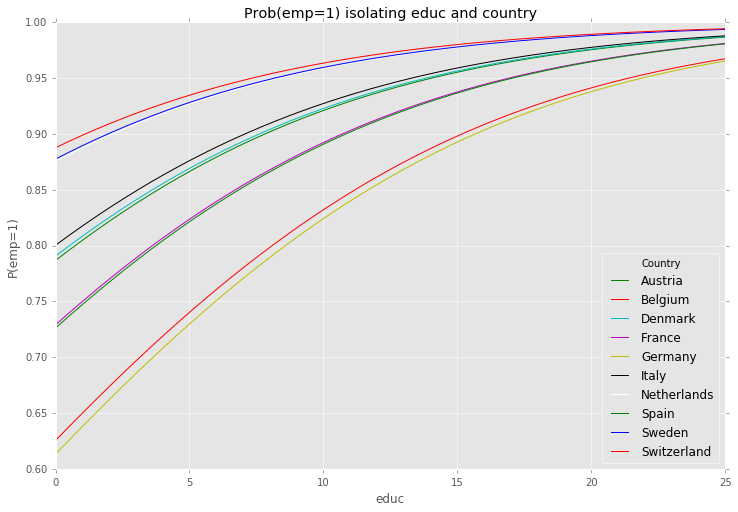

In [53]:
isolate_and_plot('educ')

The above plot clearly shows education in countries affects the levels of employment. The probability of being employed gradually increases as level of education rises.

## VII. Conclusion

Keeping all of the above in mind, we can conclude that an increase in education years lead to an eventual increase in labor force participation (an increase of 0.0087). Moreover, it is apparent that people who attain higher levels of education are more likely to be employed. These findings are consistent with the existing literature and prove that the results can be generalized to some extent to different countries. These results have direct policy implications for the government to undertake. For instance, employment policies should be carefully planned and implemented. The society should be made more aware of educating their women and be informed of the importance of female labor force participation. 
Even though in our data the difference in education and employment opportunities between countries is not that evident, however that maybe due to the fact that we only consider Western European countries which are all developed nations
In conclusion, special emphasis should be put on attaining education so that more people become a part of the labor force which, in the long run would boost the growth of the economy. 



## VIII. Reference <a id='Reference'></a>

1. [Leo Vance, Nicholas Stoney, Steven Kennedy, 2009, Labour force participation and the influence of educational attainment , Department of the Treasury (Australia).](http://web.archive.org/web/20090929123452/http://www.treasury.gov.au/documents/1633/PDF/2_Labour_force.pdf)
2. [Edward Bbaale, Paul Mpuga, 2011, Female Education, Contraceptive Use, and Fertility: Evidence from Uganda, Columbia University Academic Commons.](http://www.consiliencejournal.org/index.php/consilience/article/viewFile/234/79)
3. [Börsch-Supan, A., C. Hunkler, S. Gruber, A. Orban, S. Stuck, M. Brandt (2016). easySHARE. Release version: 5.0.0. SHARE-ERIC. Data set DOI: 10.6103/SHARE.easy.500.](http://www.share-project.org/data-access-documentation/easyshare.html)